In [6]:
from models import Deconvolution_2D
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import convolution_matrix

In [14]:
def create_circle_image(size, radius):
    img = np.zeros((size, size))
    y, x = np.ogrid[-size//2:size//2, -size//2:size//2]
    mask = (x**2 + y**2 <= radius**2) & ( x**2 + y**2 >= (radius/2)**2)
    img[mask] = 1
    return img

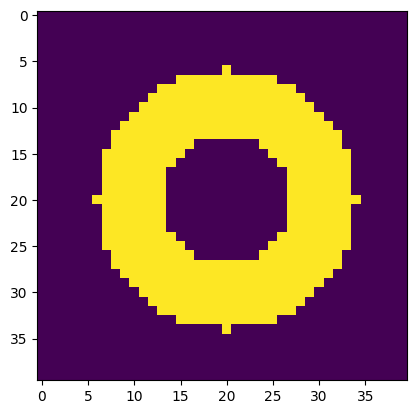

In [45]:
PSF_size = 30
PSF_param = 3.0
BC = 'reflect'
deconv = Deconvolution_2D(PSF_size, PSF_param, BC)
image = create_circle_image(40, 14)

true = image
temp = deconv.forward(image)

y_data = temp + np.random.normal(0, 0.05, temp.shape)

plt.imshow(image)
# Apply the forward operation (blur the image)
blurred_image = deconv.forward(image)


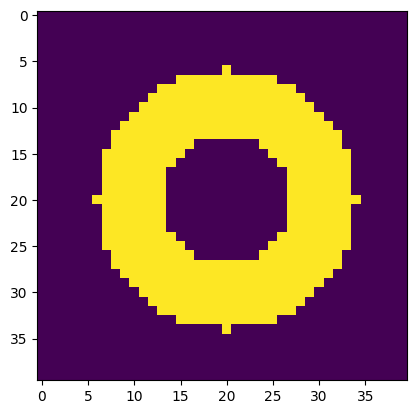

In [47]:
a = image.flatten()
plt.imshow(a.reshape(40, 40))

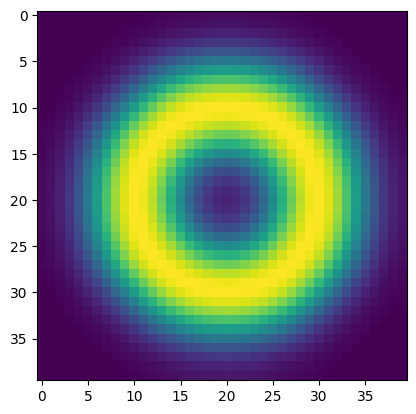

In [44]:
plt.imshow(blurred_image)

In [42]:
print(np.arange(200*200))

[    0     1     2 ... 39997 39998 39999]
